In [37]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv('mal_top2000_anime.csv')
df = df.drop('Unnamed: 0', axis=1)

In [38]:
print(df.head(5))
print(df.columns)

                                 Name Type  Score  Score Rank  \
0    Fullmetal Alchemist: Brotherhood   TV   9.14           1   
1                        Spy x Family   TV   9.09           2   
2  Shingeki no Kyojin Season 3 Part 2   TV   9.08           3   
3                         Steins;Gate   TV   9.08           4   
4                            Gintama°   TV   9.08           5   

   Popularity Rank                     Air Date  \
0                3   Apr 5, 2009 to Jul 4, 2010   
1              350             Apr 9, 2022 to ?   
2               32  Apr 29, 2019 to Jul 1, 2019   
3               13  Apr 6, 2011 to Sep 14, 2011   
4              335  Apr 8, 2015 to Mar 30, 2016   

                                      Studio  Num. of episodes  \
0                                  ['Bones']                64   
1  ['Wit Studio', '            CloverWorks']                12   
2                             ['Wit Studio']                10   
3                              ['White

In [39]:
top5 = df.head(5).sort_values(['Score'],ascending=False)
display(top5)

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?","['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",None
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


In [40]:
score_mean_per_studio = df[['Name','Score','Studio']]
display(score_mean_per_studio.groupby(by='Studio').mean())

,Score
Studio,
"[""Brain's Base"", ' Marvy Jack']",8.105000
"[""Brain's Base""]",7.984231
"['10Gauge', ' Studio DURIAN']",7.720000
['8bit'],7.706875
"['A-1 Pictures', ' Bridge', ' CloverWorks']",7.550000
...,...
['asread.'],7.503333
['dwarf'],7.660000
['feel.'],8.002857


in the above situation, the groupings consider each joint work of studios as a "unique studio".

In [41]:
score_mean_per_studio_unique = score_mean_per_studio.loc[:,('Score','Studio','Name')]

score_mean_per_studio_unique['Studio'] = score_mean_per_studio_unique['Studio'].apply(literal_eval)
score_mean_per_studio_unique = score_mean_per_studio_unique.set_index(['Score','Name']).apply(pd.Series.explode).reset_index()
display(score_mean_per_studio_unique.head(5))

,Score,Name,Studio
0,9.14,Fullmetal Alchemist: Brotherhood,Bones
1,9.09,Spy x Family,Wit Studio
2,9.09,Spy x Family,CloverWorks
3,9.08,Shingeki no Kyojin Season 3 Part 2,Wit Studio
4,9.08,Steins;Gate,White Fox


In [42]:
display(score_mean_per_studio_unique.groupby(by='Studio').mean().sort_values(by='Score', ascending=False))

,Score
Studio,
K-Factory,9.030
Studio Signpost,8.780
P.I.C.S.,8.750
Studio VOLN,8.570
Kitty Film Mitaka Studio,8.565
...,...
Gaina,7.410
Wulifang Digital,7.410
Bandai Namco Pictures,7.410


In [43]:
score_mean_per_studio_unique[score_mean_per_studio_unique['Studio'].str.contains('Bones')]

,Score,Name,Studio
0,9.14,Fullmetal Alchemist: Brotherhood,Bones
29,8.81,Mob Psycho 100 II,Bones
128,8.48,Mob Psycho 100,Bones
131,8.47,Josee to Tora to Sakana-tachi,Bones
184,8.38,Cowboy Bebop: Tengoku no Tobira,Bones
...,...,...,...
1857,7.48,Fullmetal Alchemist: Brotherhood - 4-Koma Theater,Bones
1948,7.45,Darker than Black: Ryuusei no Gemini,Bones
2004,7.44,Towa no Quon 3: Mugen no Renza,Bones
2009,7.44,Boku no Hero Academia 5th Season,Bones


In [44]:

display(score_mean_per_studio_unique[score_mean_per_studio_unique['Score']>=9].groupby(by='Studio').mean().sort_values(by='Score', ascending=False))

,Score
Studio,
Bones,9.140
CloverWorks,9.090
Wit Studio,9.085
White Fox,9.080
Bandai Namco Pictures,9.065
Madhouse,9.050
Sunrise,9.045
TMS Entertainment,9.040
Kitty Film Mitaka Studio,9.030


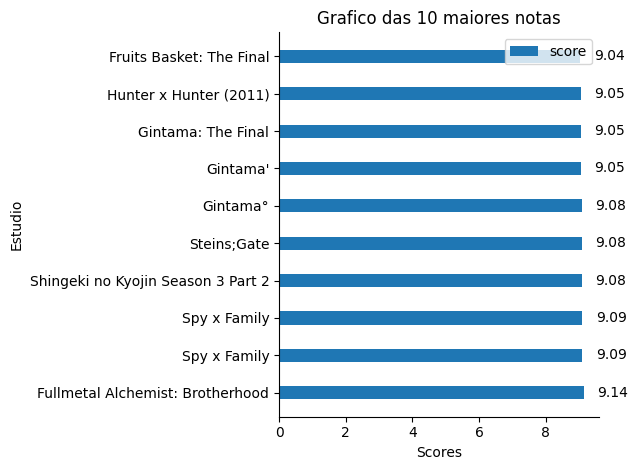

In [74]:
import matplotlib.pyplot as plt
import numpy as np


teste = score_mean_per_studio_unique.loc[:9,('Score','Studio','Name')]

x = np.arange(len(teste['Studio']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x, teste['Score'], width, label='score')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Estudio')
ax.set_xlabel('Scores')
ax.set_title('Grafico das 10 maiores notas')
ax.set_yticks(x, teste['Name'])
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.bar_label(rects1, padding=10)
fig.tight_layout()
plt.show()